### Annual Fraction ####

In [1]:

def plot_diagnostics(com_res, cat, filename):
    import matplotlib.pyplot as plt
    import json
    import numpy as np
    plt.rcParams.update({'font.size': 12})

    f = open(filename)
    data_all = json.load(f)
    if com_res == 'commercial':
        nrows = 5
        ncols = 4
        x=15
        y=16
    elif com_res == 'residential':
        ncols = 8
        nrows = 6
        x=30
        y=30
    end_uses = list(data_all[com_res].keys())
    fig, ax = plt.subplots(
        nrows, ncols, figsize=(x,y), sharex=True, sharey=True)
    i = j = 0
    for eu in end_uses:
        building_types = list(data_all[com_res][eu].keys())
        for bt in building_types:
            emm_regions = list(
                data_all[com_res][eu][bt]['load shape'].keys())
            for emm in emm_regions:
                data = data_all[com_res][eu][bt]['load shape'][emm]
                x = range(len(data))
                y = np.cumsum(data)
                ax[i, j].set_title(f'eu={eu}\nbt={bt}')
                ax[i, j].plot(x, y, label=emm)
                if i == nrows - 1:
                    ax[i, j].set_xlabel("Hour of Year")
                if j == 0:
                    ax[i, j].set_ylabel("Fraction Annual Load Consumed")
                # if j == ncols - 1:
                #     ax[0, j].legend(loc='upper left', bbox_to_anchor=(1, 1))
            j = j + 1
            if j > ncols-1:
                i = i + 1
                j = 0
    plt.tight_layout()
    plt.savefig(f'diagnostics/Annual fraction_{com_res[:3]}_{cat}.png',
                dpi=100, bbox_inches='tight')


residential
commercial
--- Overall Runtime 00:00:37.54 (HH:MM:SS.mm) ---


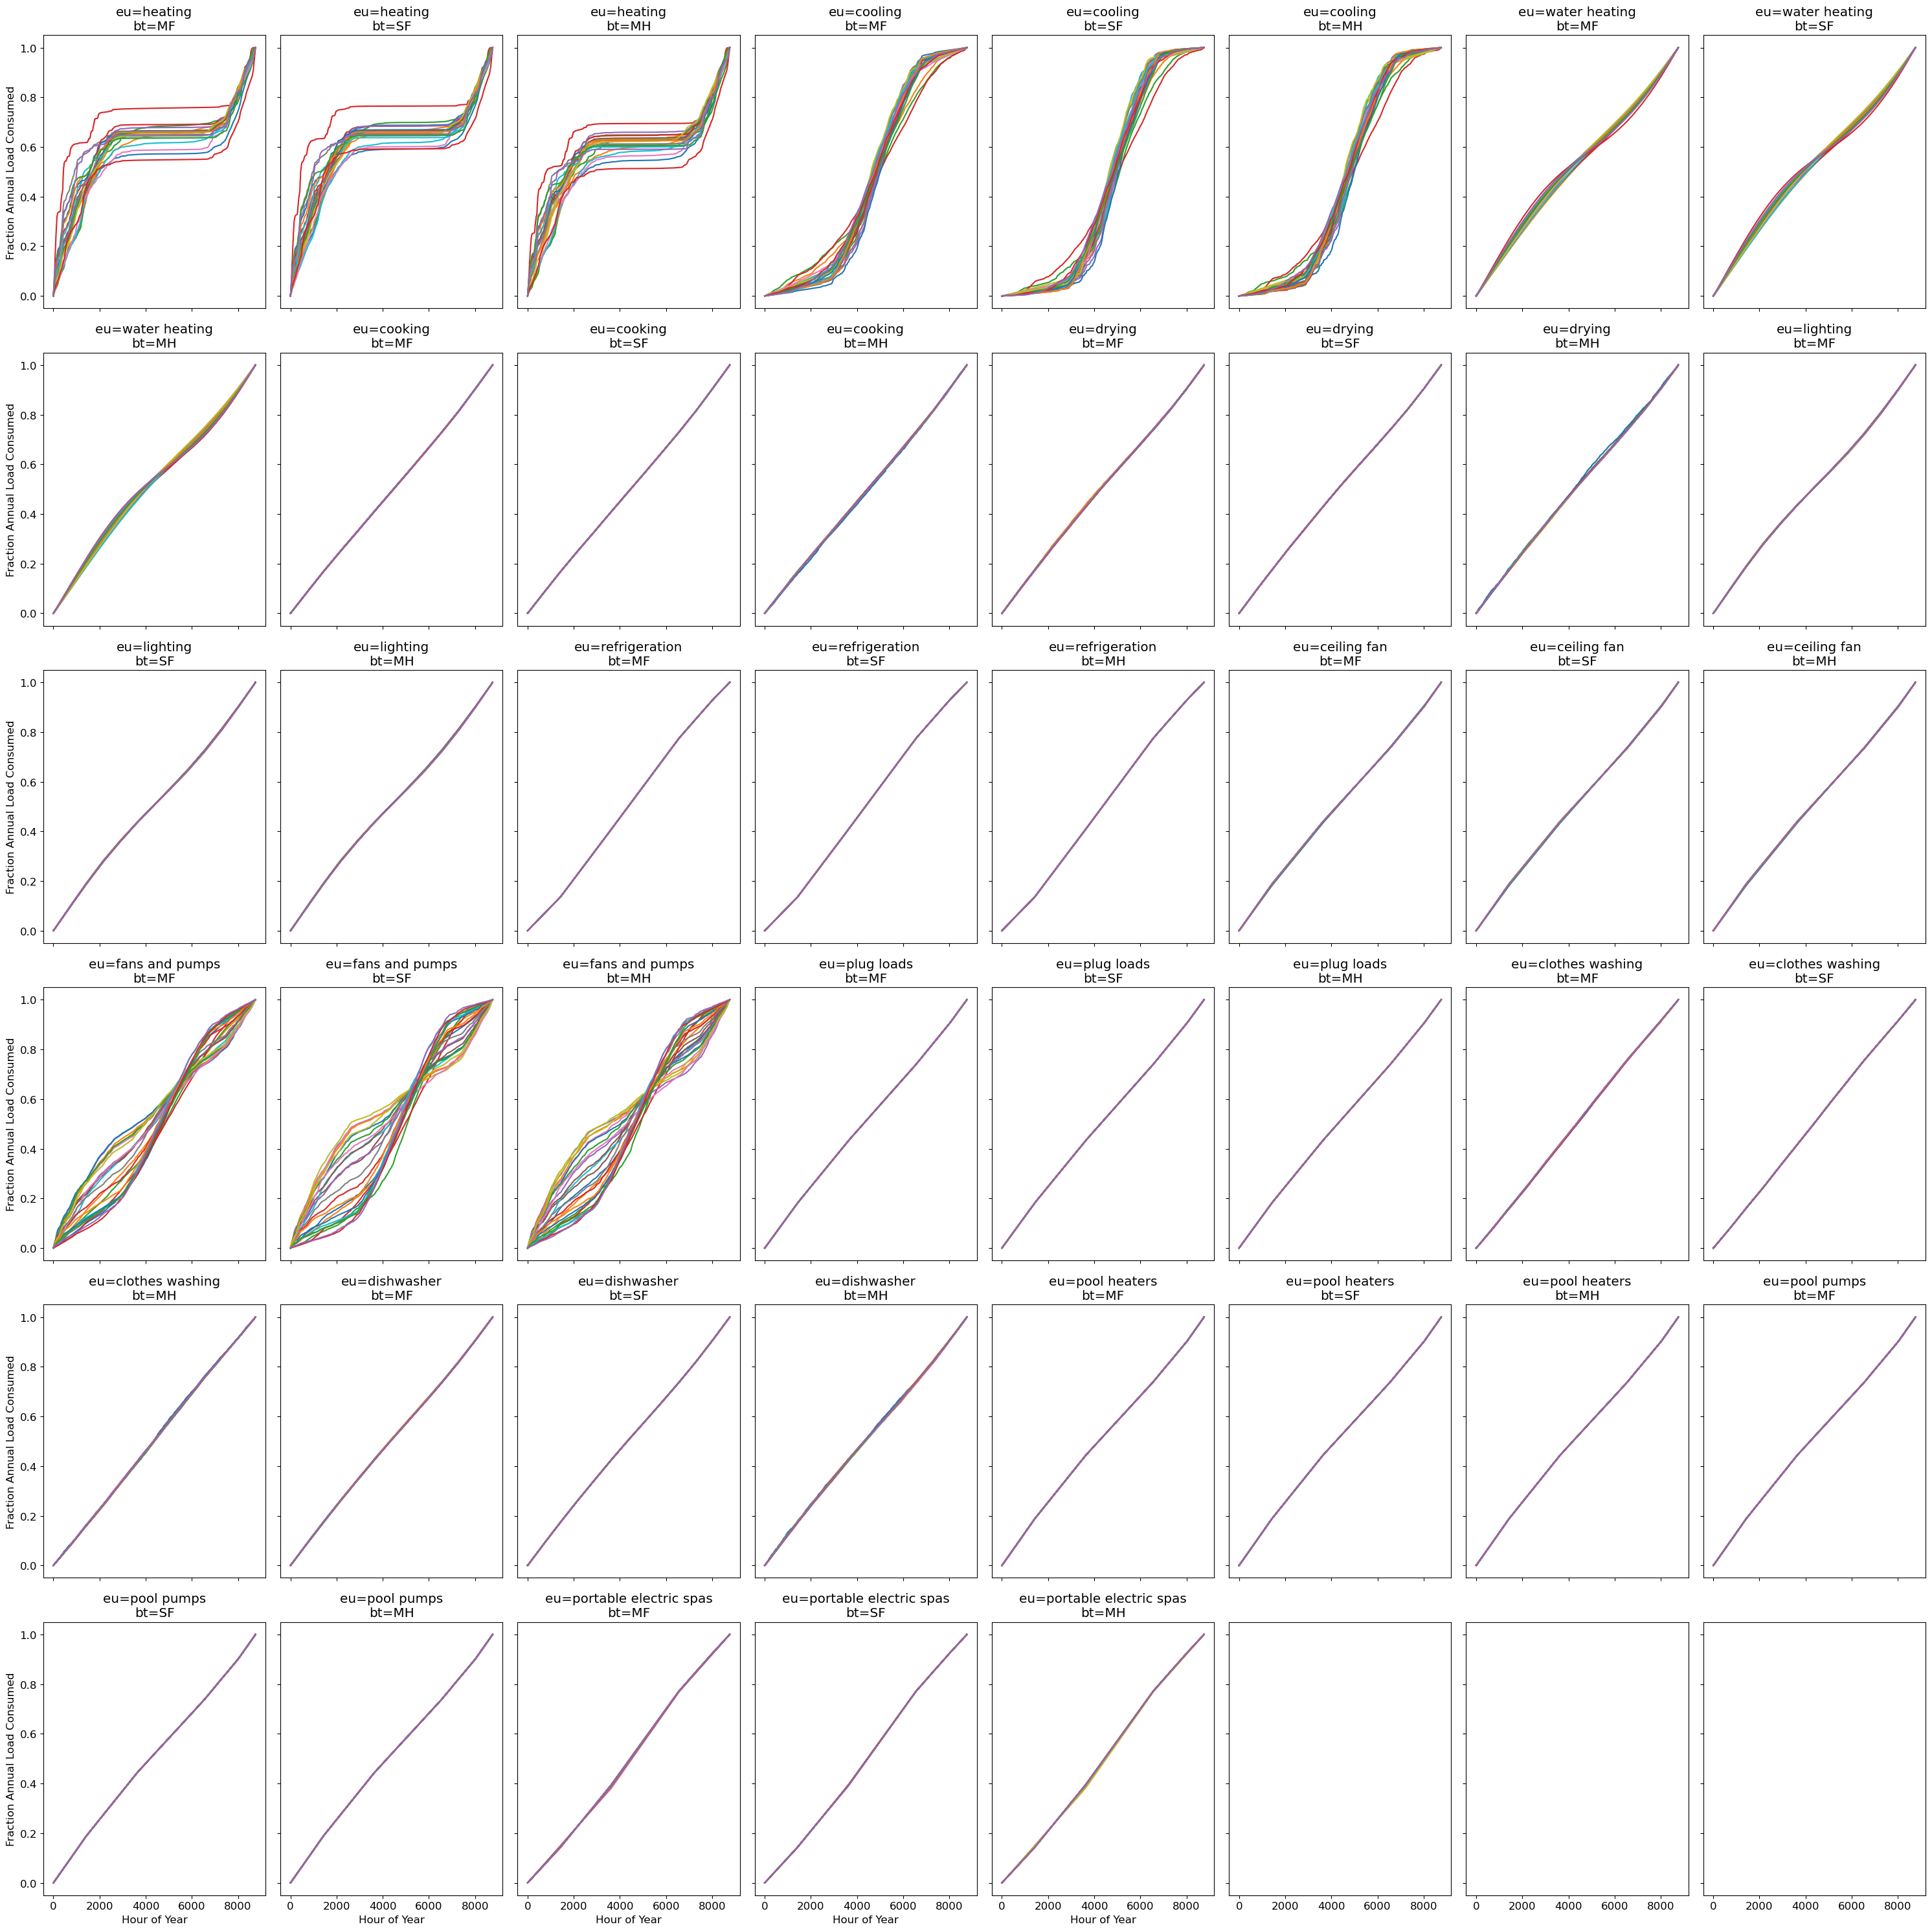

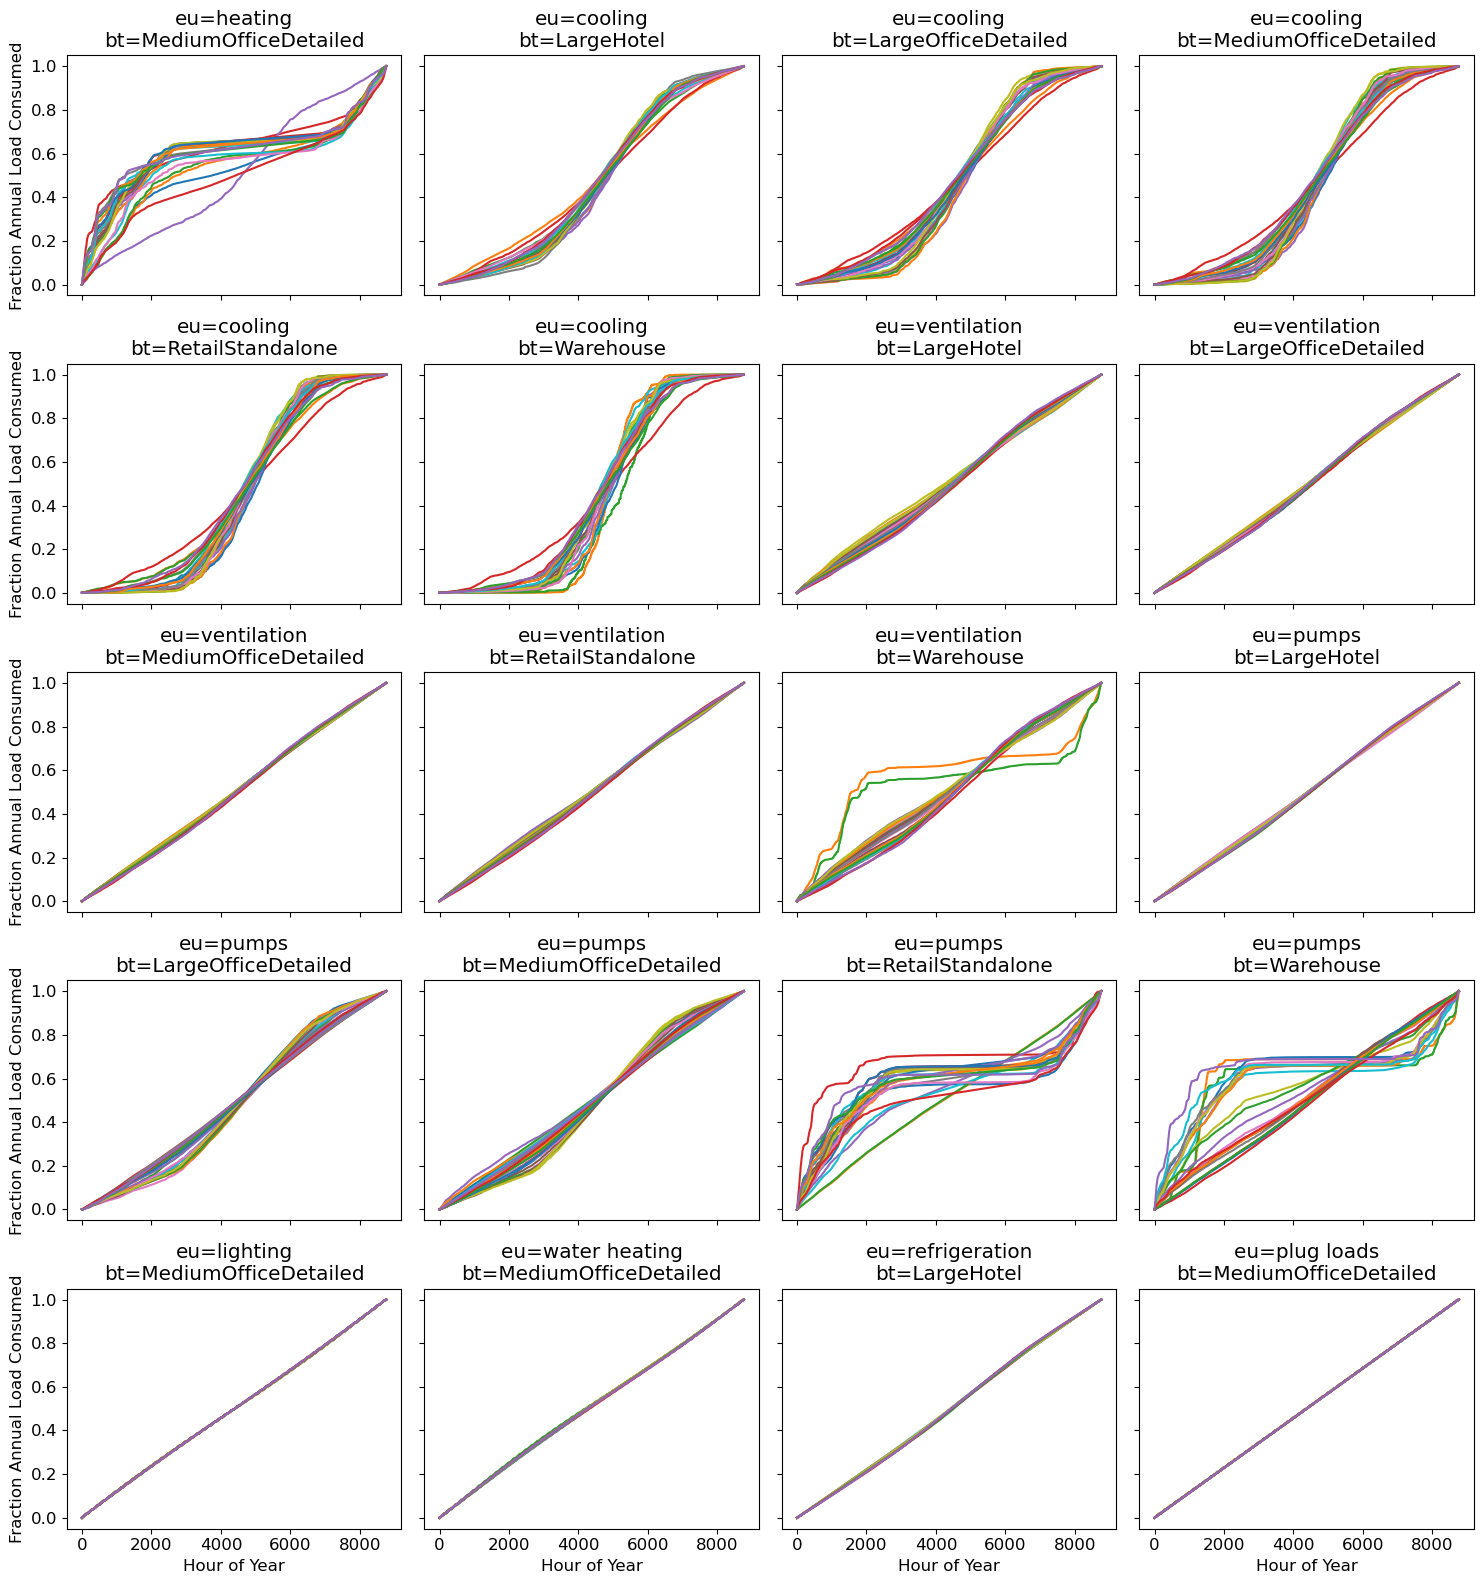

In [2]:
import pandas as pd
import time

start_time = time.time()

comstock_df = pd.DataFrame()
# comstock_df = get_comstock_data()

# if comstock_df.empty:
#     comstock_df = pd.read_csv('emm_comstock.csv')
# update_tsv_load_comm(comstock_df)

# cat = 'state'
cat = 'emm'
filename = f"json/alldecimals/tsv_load_{cat}_2024.json"
sec = "residential"
print(sec)
plot_diagnostics(sec, cat, filename)
sec = "commercial"
print(sec)
plot_diagnostics(sec, cat, filename)

hours, rem = divmod(time.time() - start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("--- Overall Runtime %s (HH:MM:SS.mm) ---" %
      "{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))